In [ ]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

: 

In [18]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import time
from itertools import combinations, groupby

## Generating graph

In [2]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

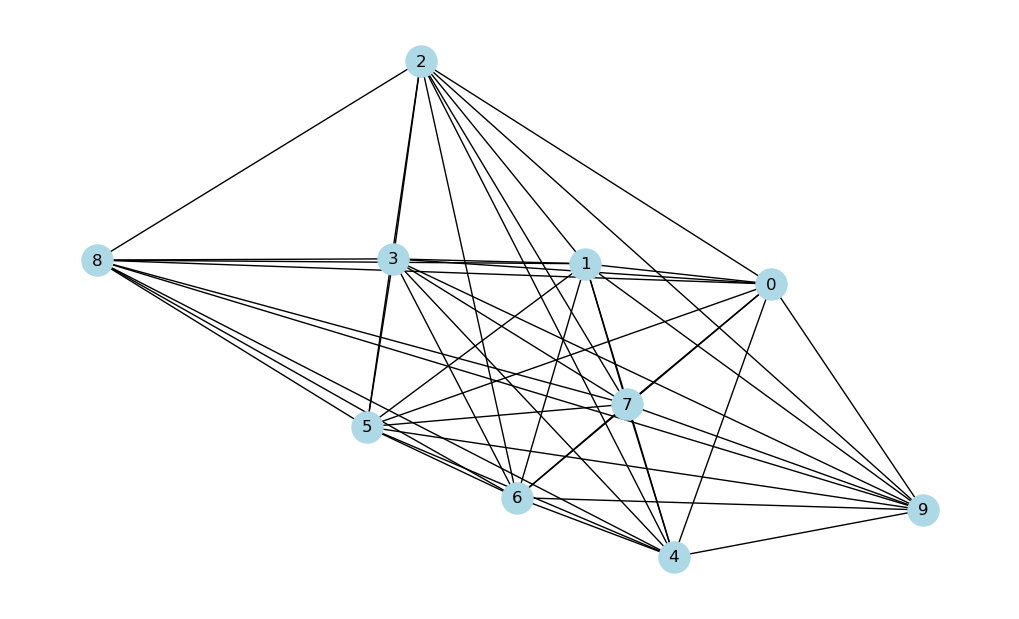

In [24]:
G = gnp_random_connected_graph(10, 1, False, True)

In [135]:
class Tester():
    """
    Time test and graph drawer class
    """
    def __init__(self, function: callable, function_nx: callable, algorithm: str) -> None:
        self.function=function
        self.function_nx=function_nx
        self.algorithm=algorithm
        self.own_time_list=[0]
        self.value_list=[0]
        self.algo_time_list=[0]

    def time_test(self, ITERATIONS, values = []) -> None:
        """
        Finds how much time the function executes
        """
        for value in values:
            tmp_time=0
            tmp_time_2=0
            for _ in range(ITERATIONS):
                tmp_graph=gnp_random_connected_graph(value, 100)
                start_time=time.time()
                self.function(tmp_graph)
                tmp_time+=(time.time()-start_time)

                start_time=time.time()
                self.function_nx(tmp_graph,algorithm=self.algorithm) if self.algorithm else self.function_nx(tmp_graph)
                tmp_time_2+=(time.time()-start_time)
            
            self.value_list.append(value)
            self.own_time_list.append(tmp_time/ITERATIONS)
            self.algo_time_list.append(tmp_time_2/ITERATIONS)
            print(f'OWN IMPLEMENTATION\nmean time == {self.own_time_list[-1]} N={value}\n\n\
nx implementation\nmean time == {self.algo_time_list[-1]} N={value}')

    def draw_graph(self):
        """
        Draws time graph
        """
        ax=plt.subplot()
        line1=ax.plot(self.value_list,self.own_time_list,label=self.function.__name__+", own implementation")
        ax.set_ylabel('Runtime')
        ax.set_xlabel('Values')
        line2=ax.plot(self.value_list,self.algo_time_list,label=self.function.__name__+", nx implementation")
        ax.legend()
        plt.show()

# For Task 1

## Kruskal's algorithm

In [37]:
from networkx.algorithms.tree import minimum_spanning_tree

In [38]:
mstk = minimum_spanning_tree(G, algorithm="kruskal")
VALS=[5,10,20,50,100,200,500]

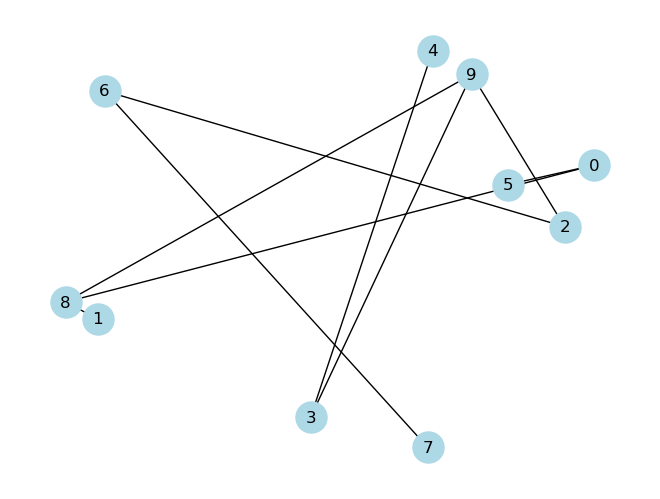

In [40]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [41]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 8), (0, 5), (1, 8), (2, 6), (2, 9), (3, 9), (3, 4), (6, 7), (8, 9)]),
 9)

In [110]:
class DisjointSet:
    """
    Disjoin set class;
    """
    def __init__(self, graph: nx.Graph)-> None:
        self.parents={node: node for node in graph.nodes}
    def find(self, u):
        """
        Recursively finds node's parent
        """
        if self.parents[u]==u:
            return u
        return self.find(self.parents[u])
    def union(self, u, v):
        """
        Unites 2 different nodes
        """
        if self.find(u)!=self.find(v):
            self.parents[self.find(u)]=v

def kruskal(graph: nx.Graph)-> nx.Graph | None:
    """
    Finds a MST for the graph using Kruskal's algorithm.
    Returns none if graph is disconnected
    """
    if not nx.is_connected(graph):
        return None
    graph_set=DisjointSet(graph)
    result_graph=nx.Graph()
    edges=sorted([(u,v,w['weight']) for u,v,w in graph.edges(data=True)],key=lambda x:x[2])
    while len(result_graph.edges)<len(graph.nodes)-1:
        curr_edge=edges.pop(0)
        if graph_set.find(curr_edge[0])!=graph_set.find(curr_edge[1]):
            result_graph.add_edge(curr_edge[0],curr_edge[1],weight=curr_edge[2])
            graph_set.union(curr_edge[0],curr_edge[1])
    return result_graph

In [112]:
kruskal_test=Tester(kruskal,minimum_spanning_tree,"kruskal")
kruskal_test.time_test(10,[5,10,20,50,100,200,500])


OWN IMPLEMENTATION
mean time == 3.168582916259766e-05 N=5

nx implementation
mean time == 5.3715705871582034e-05 N=5
OWN IMPLEMENTATION
mean time == 0.00020835399627685546 N=10

nx implementation
mean time == 0.00011842250823974609 N=10
OWN IMPLEMENTATION
mean time == 0.0001489877700805664 N=20

nx implementation
mean time == 0.00022752285003662108 N=20
OWN IMPLEMENTATION
mean time == 0.0008608579635620117 N=50

nx implementation
mean time == 0.0012175559997558594 N=50
OWN IMPLEMENTATION
mean time == 0.00352632999420166 N=100

nx implementation
mean time == 0.004661679267883301 N=100
OWN IMPLEMENTATION
mean time == 0.022990775108337403 N=200

nx implementation
mean time == 0.05520179271697998 N=200
OWN IMPLEMENTATION
mean time == 0.308748459815979 N=500

nx implementation
mean time == 0.3446291446685791 N=500


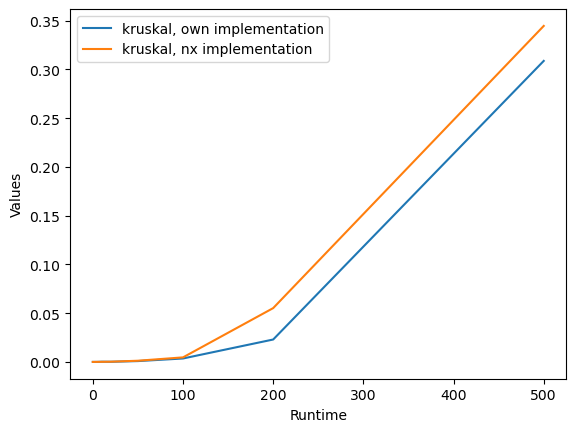

[0,
 5.3715705871582034e-05,
 0.00011842250823974609,
 0.00022752285003662108,
 0.0012175559997558594,
 0.004661679267883301,
 0.05520179271697998,
 0.3446291446685791]

In [113]:
kruskal_test.draw_graph()
kruskal_test.algo_time_list

## Prim's algorithm

In [9]:
mstp = minimum_spanning_tree(G, algorithm="prim")

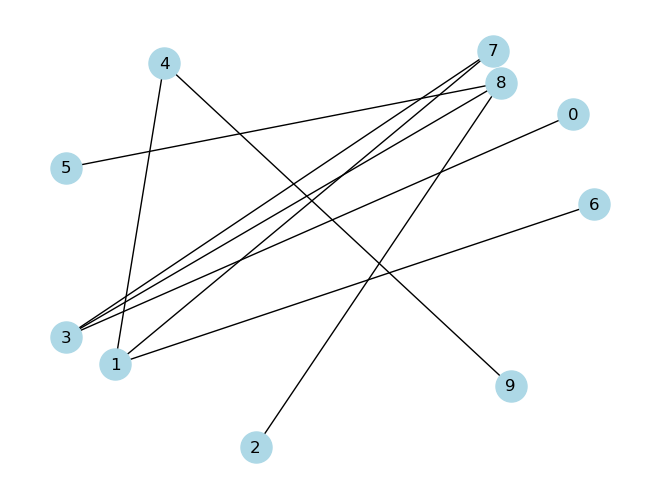

In [10]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [11]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 3), (1, 7), (1, 4), (1, 6), (2, 8), (3, 7), (3, 8), (4, 9), (5, 8)]),
 9)

In [12]:
def prim(graph: nx.Graph) -> nx.Graph or None:
    """
    Finds a MST for given graph.
    Returns none if graph is disconnected
    """
    if not nx.is_connected(graph):
        return None
    result_graph=nx.Graph()
    result_graph.add_node(0)
    while set(result_graph.nodes)!=set(graph.nodes):  
        min_edge=min(((u,v,weight['weight']) for u,v,weight in graph.edges(data=True) \
            if (u in result_graph.nodes and v not in result_graph.nodes) or\
                  (u not in result_graph.nodes and v in result_graph.nodes)),\
                    key=lambda x:x[2])
        result_graph.add_edge(min_edge[0],min_edge[1],weight=min_edge[2])
    return result_graph


OWN IMPLEMENTATION
mean time == 0.00010275840759277344 N=5

nx implementation
mean time == 5.9604644775390625e-05 N=5
OWN IMPLEMENTATION
mean time == 0.00020766258239746094 N=10

nx implementation
mean time == 6.341934204101562e-05 N=10
OWN IMPLEMENTATION
mean time == 0.0012166500091552734 N=20

nx implementation
mean time == 0.00034308433532714844 N=20
OWN IMPLEMENTATION
mean time == 0.019567489624023438 N=50

nx implementation
mean time == 0.0012385845184326172 N=50
OWN IMPLEMENTATION
mean time == 0.15912342071533203 N=100

nx implementation
mean time == 0.003422260284423828 N=100
OWN IMPLEMENTATION
mean time == 1.3664195537567139 N=200

nx implementation
mean time == 0.015649795532226562 N=200
OWN IMPLEMENTATION
mean time == 5.535423994064331 N=300

nx implementation
mean time == 0.15284132957458496 N=300


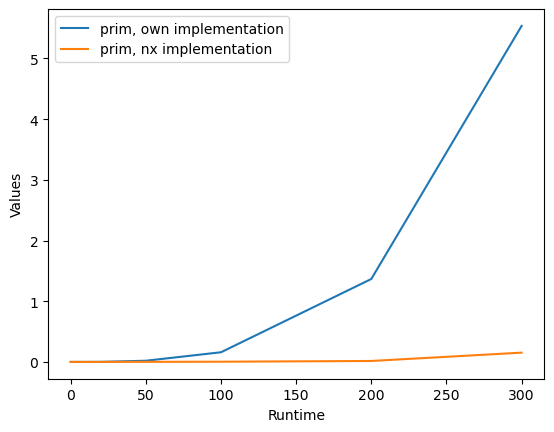

In [114]:
prim_test=Tester(prim,minimum_spanning_tree,"prim")
prim_test.time_test(1,[5,10,20,50,100,200,300])
prim_test.draw_graph()


# For Task 2

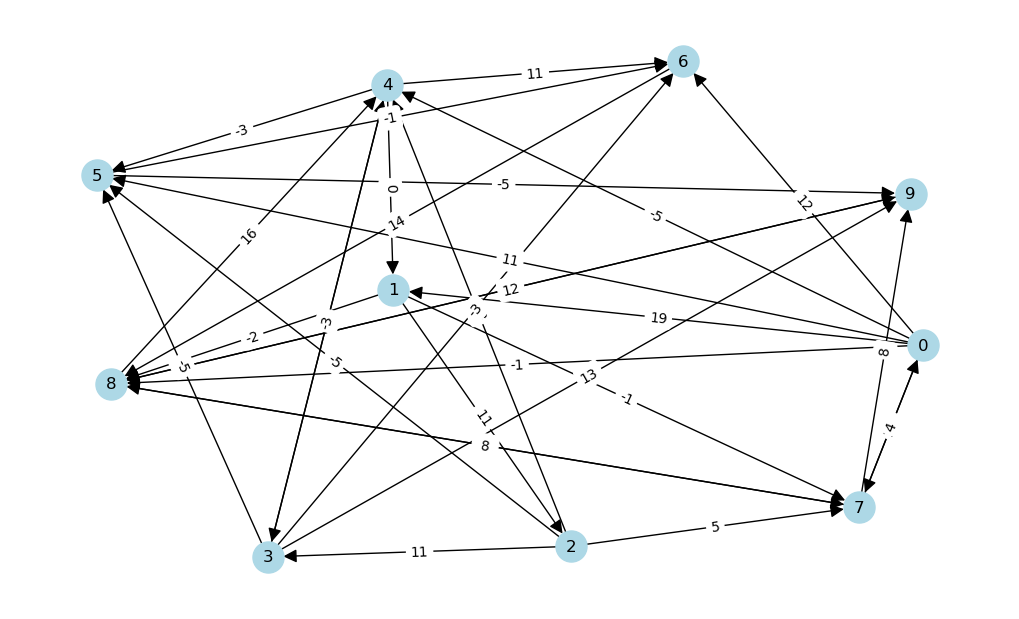

In [13]:
G = gnp_random_connected_graph(10, 0.5, True, True)

## Bellman-Ford algorithm

In [14]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [152]:
def bellman_ford_nx(Gr,pos=0):
    try:
        a=bellman_ford_predecessor_and_distance(Gr,pos)
    except:
        print("Negative cycle detected")

In [2]:
def bellman_ford(graph: nx.Graph, begin_node:int = 0):
    """
    Finds shortest path with Bellman Ford algorithm
    """
    distance=[float('inf') for _ in range(len(graph.nodes))]
    predecessor=[float('inf') for _ in range(len(graph.nodes))]
    visited=[False for _ in range(len(graph.nodes))]
    distance[begin_node]=0
    for _ in range(len(graph.nodes)-1):
        for u,v,w in graph.edges(data=True):
            if distance[u]+w['weight']<distance[v]:
                distance[v]=distance[u]+w['weight']
                predecessor[v]=u
    for u,v,w in graph.edges(data=True):
        if distance[u]+w['weight']<distance[v]:
            predecessor[v]=u
            visited[v]=True
            while not visited[u]:
                visited[u]=True
                u=predecessor[u]
            cycle=[u]
            v=predecessor[u]
            while v!=u:
                cycle.append(v)
                v=predecessor[v]
            return f'Negative cycle detected, {cycle}'
    return distance

NameError: name 'nx' is not defined

Negative cycle detected
Negative cycle detected
Negative cycle detected
Negative cycle detected
OWN IMPLEMENTATION
mean time == 2.6416778564453124e-05 N=5

nx implementation
mean time == 4.868507385253906e-05 N=5
Negative cycle detected
Negative cycle detected
Negative cycle detected
Negative cycle detected
Negative cycle detected
OWN IMPLEMENTATION
mean time == 9.288787841796876e-05 N=10

nx implementation
mean time == 0.00012612342834472656 N=10
Negative cycle detected
Negative cycle detected
Negative cycle detected
Negative cycle detected
Negative cycle detected
OWN IMPLEMENTATION
mean time == 0.0008411407470703125 N=20

nx implementation
mean time == 0.0009069442749023438 N=20
Negative cycle detected
Negative cycle detected
Negative cycle detected
Negative cycle detected
Negative cycle detected
OWN IMPLEMENTATION
mean time == 0.01179203987121582 N=50

nx implementation
mean time == 0.010018587112426758 N=50
Negative cycle detected
Negative cycle detected
Negative cycle detected
Neg

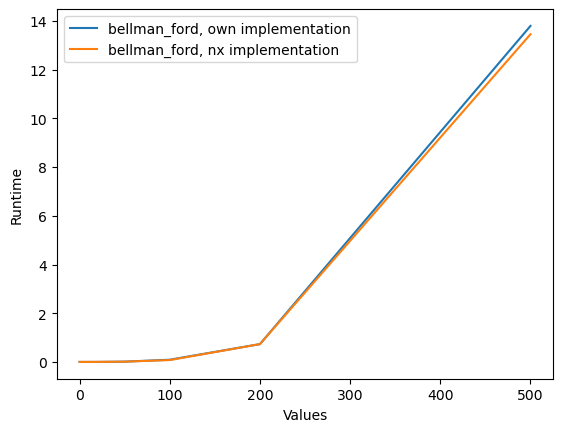

In [160]:
bf_test=Tester(bellman_ford,bellman_ford_nx, None)
bf_test.time_test(5,[5,10,20,50,100,200,500])
bf_test.draw_graph()

## Floyd-Warshall algorithm

In [161]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [162]:
def warshall_nx(Gr):
    try:
        pred, dist = floyd_warshall_predecessor_and_distance(Gr) 
    except:
        print("Negative cycle detected")

In [163]:
def floyd_warshall(graph: nx.Graph):
    """
    Finds shortest path between all the pairs of nodes
    """
    distance=[[float('inf') if i!=j else 0 for j in range(len(graph.nodes))]\
             for i in range(len(graph.nodes))]
    for u,v,w in graph.edges(data=True):
        distance[u][v]=w['weight']
    for k in range(len(graph.nodes)):
        for i in range(len(graph.nodes)):
            for j in range(len(graph.nodes)):
                if distance[i][j]>distance[i][k]+distance[k][j]:
                    distance[i][j]=distance[i][k]+distance[k][j]
    return distance

OWN IMPLEMENTATION
mean time == 2.6416778564453124e-05 N=5

nx implementation
mean time == 3.7336349487304686e-05 N=5
OWN IMPLEMENTATION
mean time == 9.288787841796876e-05 N=10

nx implementation
mean time == 0.00015654563903808594 N=10
OWN IMPLEMENTATION
mean time == 0.0010481834411621093 N=20

nx implementation
mean time == 0.0018699169158935547 N=20
OWN IMPLEMENTATION
mean time == 0.00836496353149414 N=50

nx implementation
mean time == 0.01691908836364746 N=50
OWN IMPLEMENTATION
mean time == 0.061609935760498044 N=100

nx implementation
mean time == 0.13779940605163574 N=100
OWN IMPLEMENTATION
mean time == 0.4715436935424805 N=200

nx implementation
mean time == 1.172386360168457 N=200
OWN IMPLEMENTATION
mean time == 8.098394727706909 N=500

nx implementation
mean time == 21.26672601699829 N=500


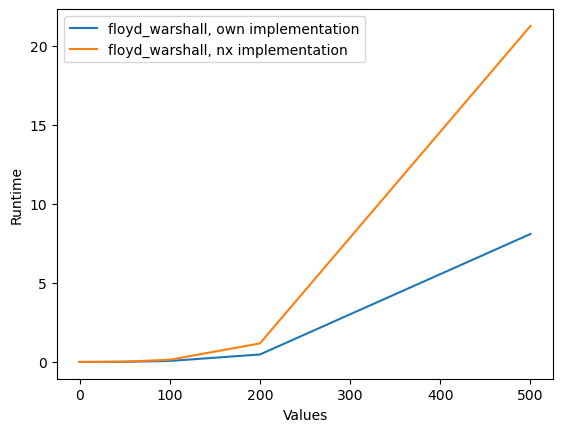

In [166]:
warshall_test=Tester(floyd_warshall,warshall_nx,None)
warshall_test.time_test(5,[5,10,20,50,100,200,500])
warshall_test.draw_graph()

## Some useful explanations

### How to get list of edges for your algorithm

In [46]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [47]:
edges[:5]

[(0, 2), (0, 5), (0, 6), (0, 7), (0, 8)]

### To get edges with weights

In [48]:
edges = list(G.edges(data=True))

In [49]:
edges[:5]

[(0, 2, {'weight': 17}),
 (0, 5, {'weight': 19}),
 (0, 6, {'weight': 8}),
 (0, 7, {'weight': 17}),
 (0, 8, {'weight': -5})]

In [50]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [51]:
import time
from tqdm import tqdm

In [52]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  0%|          | 0/1000 [00:00<?, ?it/s]

0.00309446382522583